# Gradient Descent

1. Given a start-point, a goal point, and two obstacles (defined in the provided code), implement the artificial potential field method to plan a collision-free trajectory from the starting point to the target point, while avoiding the two obstacles.
2. Visualize the planned trajectory, clearly showing the start point, target point, obstacles, and the path generated by your planner.

In [2]:
# import necessary python packages
import torch
import matplotlib.pyplot as plt

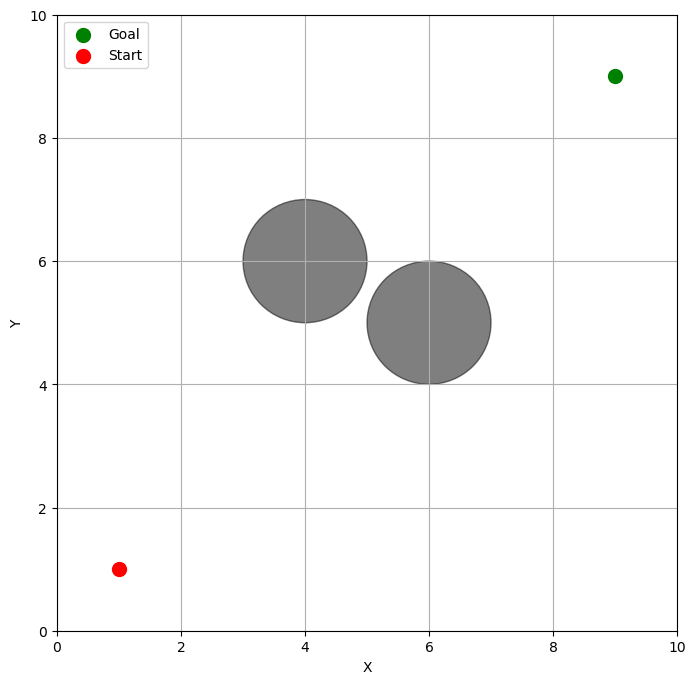

In [3]:
# Parameters for the environment
Goal = torch.tensor([9.0, 9.0], dtype=torch.float32)  # goal position
Start = torch.tensor([1.0, 1.0], dtype=torch.float32)  # start position

Obstacles = torch.tensor([[4.0, 6.0], [6.0, 5.0]], dtype=torch.float32)  # obstacle positions
Obstacle_radius = 1  # radius of the circular obstacles
Threshold = 4 # Threshold (i.e., rho_0), typically larger than Obstacle_radius

# Plotting the environment
plt.figure(figsize=(8, 8))
plt.scatter(Goal[0], Goal[1], color="green", label="Goal", s=100)
plt.scatter(Start[0], Start[1], color="red", label="Start", s=100)
for obs in Obstacles.numpy():
    circle = plt.Circle((obs[0], obs[1]), Obstacle_radius, color="black", alpha=0.5)
    plt.gca().add_artist(circle)
# Create a grid environment
grid_size = 10  # size of the grid
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [32]:
# parameters for attractive force and repulsive force
k_att = 1.0  # attractive constant
k_rep = 100.0  # repulsive constant

# Attractive potential field (towards goal)
def attractive_potential(x, goal):
    return 0.5 * k_att * torch.norm(x - goal) ** 2

# Repulsive potential field (away from obstacles)
def repulsive_potential(x, obstacles, threshold):
    rep_total = 0
    for obs in obstacles:
        dist = torch.norm(x - obs)
        if dist <= threshold:
            potential = 0.5 * k_rep * (1.0 / dist - 1.0 / threshold) ** 2
        else:
            potential = torch.tensor(0.0)  # zero if distance > threshold (means the robot is far from the obstacle)
        rep_total += potential
    return rep_total

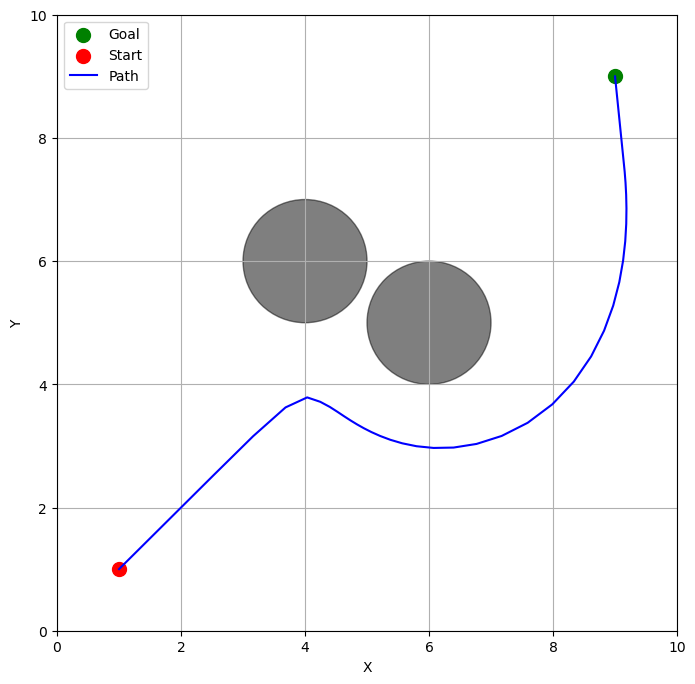

In [10]:
def potential_field(x, goal, obstacles, threshold):
    return attractive_potential(x, goal) + repulsive_potential(x, obstacles, threshold)

import numpy as np
# TODO: implement your code here, where you can use the above two provided functions
iterations = 100
STEP_SIZE = 0.1
current = Start.clone().requires_grad_(True)
current.retain_grad()
path = [current.detach().clone().numpy()]

for i in range(iterations):
    if current.grad is not None:
        current.grad.zero_()
        
    loss = potential_field(current, Goal, Obstacles, Threshold)
    loss.backward()
    #print(f"Iteration {i}: Current = {current.detach().numpy()}, Gradient = {current.grad.detach().numpy()}")
    
    with torch.no_grad():
        current -= STEP_SIZE * current.grad
        path.append(current.detach().clone().numpy())

paths = np.array(path)
    
# Plotting the environment
plt.figure(figsize=(8, 8))
plt.scatter(Goal[0], Goal[1], color="green", label="Goal", s=100)
plt.scatter(Start[0], Start[1], color="red", label="Start", s=100)
for obs in Obstacles.numpy():
    circle = plt.Circle((obs[0], obs[1]), Obstacle_radius, color="black", alpha=0.5)
    plt.gca().add_artist(circle)
# Create a grid environment
grid_size = 10  # size of the grid
plt.plot(paths[:,0], paths[:,1], color='blue',label='Path',markersize=5)
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

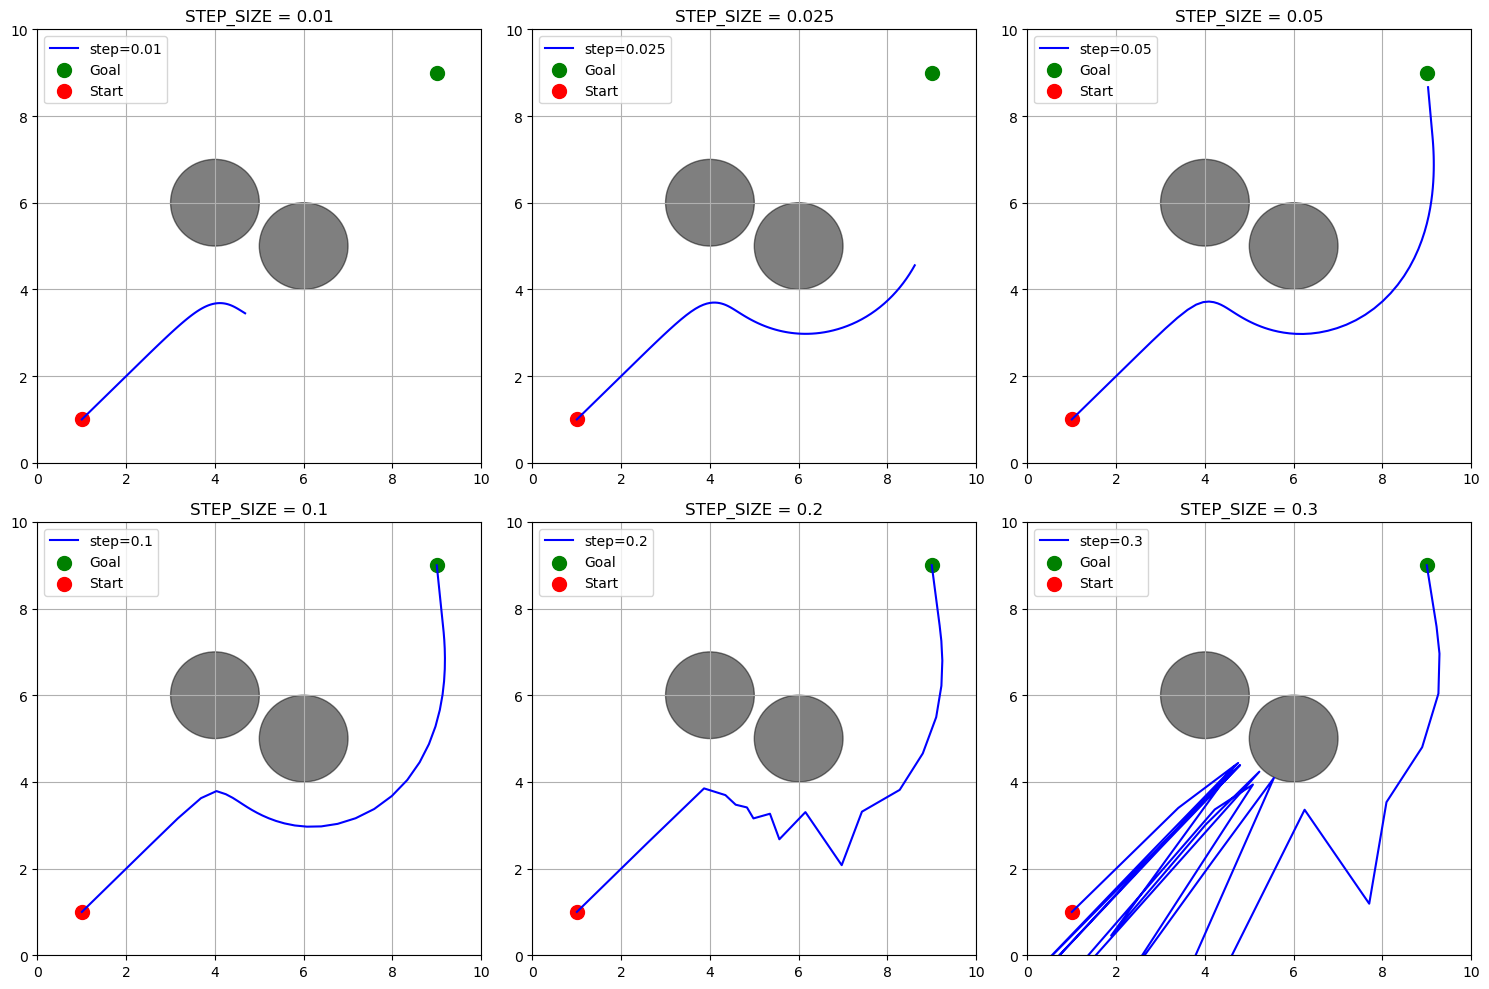

In [46]:
def potential_field(x, goal, obstacles, threshold):
    return attractive_potential(x, goal) + repulsive_potential(x, obstacles, threshold)

STEP_SIZES = [0.01, 0.025, 0.05, 0.1, 0.2, 0.3]
iterations = 100

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, step in zip(axes, STEP_SIZES):
    current = Start.clone().requires_grad_(True)
    current.retain_grad()
    path = [current.detach().clone().numpy()]

    for i in range(iterations):
        if current.grad is not None:
            current.grad.zero_()
            
        loss = potential_field(current, Goal, Obstacles, Threshold)
        loss.backward()
        
        with torch.no_grad():
            current -= step * current.grad
        path.append(current.detach().clone().numpy())

    path = np.array(path)

    # Plot path
    ax.plot(path[:, 0], path[:, 1], '-', color='blue', markersize=3, label=f"step={step}")
    ax.scatter(Goal[0], Goal[1], color="green", s=100, label="Goal")
    ax.scatter(Start[0], Start[1], color="red", s=100, label="Start")
    for obs in Obstacles.numpy():
        circle = plt.Circle((obs[0], obs[1]), Obstacle_radius, color="black", alpha=0.5)
        ax.add_artist(circle)

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_title(f"STEP_SIZE = {step}")
    ax.grid(True)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

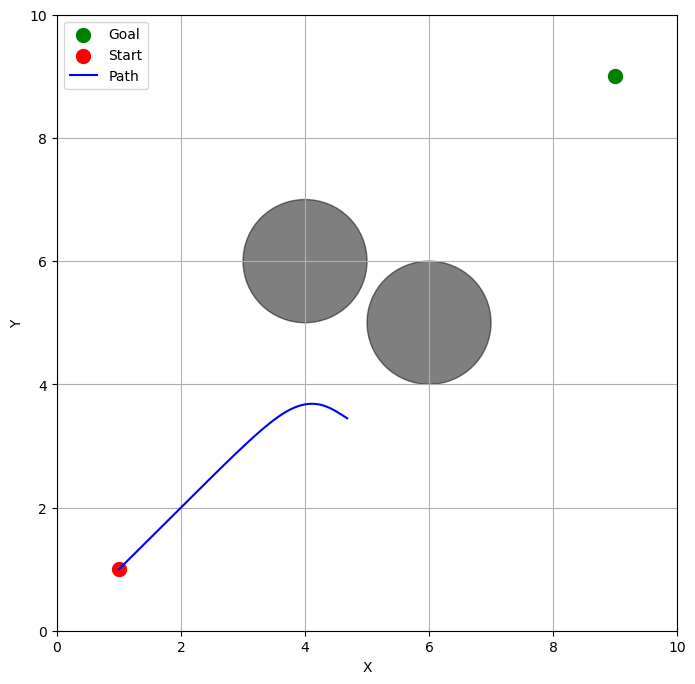

In [34]:
def potential_field(x, goal, obstacles, threshold):
    return attractive_potential(x, goal) + repulsive_potential(x, obstacles, threshold)

import numpy as np
# TODO: implement your code here, where you can use the above two provided functions
iterations = 100
STEP_SIZE = 0.01
# Correct way to set requires_grad for a leaf tensor
current = Start.clone().requires_grad_(True)
current.retain_grad()
#current.requires_grad = True
path = [current.detach().clone().numpy()]

for i in range(iterations):
    if current.grad is not None:
        current.grad.zero_()
        
    loss = potential_field(current, Goal, Obstacles, Threshold)
    loss.backward()
    #print(f"Iteration {i}: Current = {current.detach().numpy()}, Gradient = {current.grad.detach().numpy()}")
    
    with torch.no_grad():
        current -= STEP_SIZE * current.grad
        path.append(current.detach().clone().numpy())

paths = np.array(path)
    
# Plotting the environment
plt.figure(figsize=(8, 8))
plt.scatter(Goal[0], Goal[1], color="green", label="Goal", s=100)
plt.scatter(Start[0], Start[1], color="red", label="Start", s=100)
for obs in Obstacles.numpy():
    circle = plt.Circle((obs[0], obs[1]), Obstacle_radius, color="black", alpha=0.5)
    plt.gca().add_artist(circle)
# Create a grid environment
grid_size = 10  # size of the grid
plt.plot(paths[:,0], paths[:,1], color='blue',label='Path',markersize=5)
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Discussing the results

Experiment with different step size or learning rate for gradient descent, evaluate their performance. Then, analyze and discuss your findings in the report. You do not need to write code for this section—focus on interpreting and explaining the results in your discussion.